# I.  Basic Text Mining and Analysis:  Introduction

Textual analysis is frequently referred to using a variety of names.  On the technical side, people often refer to Text Analysis, Text Mining, or Natural Language Processing.  Cultural heritage professionals and humanists also frequently refer to these methods as Distant Reading (appropriating a term that XXXXX used to descirbe processes of analyzing textual metadata) or Macroanalysis (a term direved form Matthew Jockers book of the same title which introduced various methods of textual analysis using the R language for statistical programming.)  

In fact, the technical terms Text Analysis, Text Mining, and Natural Language Processing have slightly different meanings:


1.   **Text Mining** refers to process of computationally "reading" a text (or collection of texts) and extrating specific chunks of information.  It encapsulates process that convert unstrctured text to structured data.
2.   **Text Analysis** refers to processes, such as basic descriptive statistical methods or more advanced machine learning methods, that analyze the information contained in texts.  Text Analysis is frequently performed on the structured data that results from Text Mining operations, but it can also be performed directly on umstructured texts.  Text Analysis processes typically return summary data, such as lists of all references to particular dates, persons, and topics or summary statistics regarding word or phrase usage and frequency.  
3.   **Natural Language Processing** (NLP) describes a paricular subset of Text Mining and Text Analysis processes that utilize the grammatical and semantic structures associated with all natural languages as part of the mining and analysis process.  Processes that do not account for naturalness of language, such as word frequency analysis, cannot properly be consider Natural Language Processing.

This self-study module introduces basic skills and methods of text mining and analysis, focusing specifically on analytic methods rooting in descriptive statistical analysis.  As the name implies, Descriptive Statististical methods describe the basic features of the data being examined, providing simple but powerful summaries about the data.

# II.  Python Packages for Text Mining and Analysis

A wide variety of Python packages and modules are available for performing text mining and anlysis.  When executed, the code cell below will load those necessary to perform the activities presented in this course module.  Comments in the code identify each of the packages being loaded.  In each case, you can refer to the package documentation for more specific information about the package being used.  You must run the code cells below to properly prepare your environment to perfrom the text mining and analysis tasks presented in this module.

In [ ]:
# update collab environment to latest version of NLTK
# documentation: https://www.nltk.org/
!pip install nltk -U

     |████████████████████████████████| 1.5MB 5.1MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [1]:
# import the base nltk package
import nltk

# import the nltk text module
from nltk import text

# import the nltk sentence tokenizer
from nltk.tokenize import sent_tokenize

# import the nltk word_tokenize module
from nltk import word_tokenize

# import the nltk corpus reader module
from nltk.corpus import PlaintextCorpusReader

# import the nltk probability module
from nltk import probability

# import the nltk bigrams module
from nltk import bigrams

# import the nltk tag.pos_tag module
from nltk.tag import pos_tag

# import nltk.chunk modules 
from nltk.chunk import conlltags2tree, tree2conlltags

# import the nltk POS tagger
nltk.download('averaged_perceptron_tagger')

# import th nltk dispersion_plot module
from nltk.draw.dispersion import dispersion_plot

# download the nltk named entity chunker
nltk.download('maxent_ne_chunker')

# download the ntltk words library (for chunking)
nltk.download('words')

# import the punkt sentence parser for nltk
# documentation: https://www.kite.com/python/docs/nltk.punkt
nltk.download('punkt')

# import the pprint package
# documentation: https://docs.python.org/3/library/pprint.html
from pprint import pprint

# import collections python module
# documentation: https://docs.python.org/3/library/collections.html
import collections

# import the collections package counter module
from collections import Counter

# import the pandas package
# documentation: https://pandas.pydata.org/docs/
import pandas

# import the networkx package
# documentation: https://networkx.org/documentation/stable/index.html
import networkx

# import the python regular expression package
# documentation: https://docs.python.org/3/library/re.html
import re

# import Spacy NLP package 
# documentation: https://spacy.io/
import spacy

# import the Spacy display module
from spacy import displacy

# import the english core web sm english natural language module
# documentation: https://spacy.io/usage/models
import en_core_web_sm

# import the matplotlib package
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# III.  Load a Working File

There are various ways of loading a files for text mining and analysis.  Many text mining packages perform various modes of initial processing on files as they are being loaded.  In this module, we will directly load the contents of single file as our working file without performig any pre or load-time processing.  In future modules we will introduce other methods of loading collections of text files as a "corpus" for analysis.

Before you can load a file for analysis, you must mount your Google Drive in this environment.

In [2]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


Once your Google Drive has successfully mounted, you can open one of the sample data files provided for the course or a file of your own that you have placed in the data_my directory of the Course Home Directory:


1.   To load a course sample file, in the code cell below uncomment (remove the hashtag at the start of the line) the line that reads, "," and then run the cell.
2.   To load a text (ASCII) file of your own, replace the "\<filename\>" substring in the line that reads, "," with the name of your file, uncomment the line, and then run the cell.



In [3]:
working_file_path = "/gdrive/MyDrive/rbs_digital_approaches_2021/data_class/melville.txt"

Now that you've defined a file to load, we can open the file and read its contents into a string variable.

In [4]:
# open a text file for processing
working_file = open(working_file_path, "r")

# read the file contents into a string variable
working_text = working_file.read()

You can check that your file loaded by checking the length and examining the opening characters of the working_text variable.

In [5]:
# print the character length of our working text
print('Characters in string:', len(working_text))

Characters in string: 1235150


In [6]:
# look at the first 200 characters of the string
print(working_text[0:200:1])

The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman Melville

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give i


# IV. Preliminary Analysis (Data Forensics)

Whenever you begin a new text or data analysis process, the first thing that you should to is to perform some preliminary analysis.  This crucial first step, known as Data Forensics, is frequently overlooked, but it is crucial to helping us understand that actual state of our data and, more importantly, the extent and nature of cleaning and preparation that we need to do in order to ensure that our planned mining and analysis return valid results.  

The remainder of this workbook is dedicated to performing various modes of preliminary analysis.  As you perform this forensics, take note of any anomolies you see in the text.  The point of the preliminary analysis is to reveal the tye types and extent of text preparation that will have to be performed prior to analysis.  Are there parts of the text that you would want to remove before analysis?  Obvious errors in OCR or transciption that might need to be cleaned?  Things that are being mis-interpreted by the computer that might affect future analysis? All of this is crucial information.  Our group activity in the next class meeting will be to develop and implement a cleaning strategy based on your individual findings in this activity. So take good notes and be prepared to share them at our next meeting.

# V.  Chunking and Tokenizing

First, let's do some chunking.  **Chunking** (yes, that's the real, technical term) is a process of breaking a text into constituent parts, each of which is called a **token**.  Here, we'll perform two types of chunking:  Sentence and Word.

We'll begin by chunking the text into sentence tokens.  Note that, while this is primarly a module on text minging and analysis, sentnce chunking is actually a Natural Languaghe Processing operation.  Here, the sent_tokenize() function relies on the english language model that we loaded during our environment setup to apply rules for sentence formation and representation in the lanaguage (natural language information) to chunk the text into a list of sentence tokens.

In [8]:
# tokenize the text by sentence
sent_tokens = sent_tokenize(working_text)

Before we procede, let's look at our sentence tokens to make sure the process worked.

In [9]:
# print the length of the sent_tokens list
print('Sentences in text:', len(sent_tokens))

Sentences in text: 10099


In [10]:
# look at the first ten sentences
print(sent_tokens[0:10:1])

['The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman Melville\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.', "You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Moby Dick; or The Whale\n\nAuthor: Herman Melville\n\nLast Updated: January 3, 2009\nPosting Date: December 25, 2008 [EBook #2701]\nRelease Date: June, 2001\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MOBY DICK; OR THE WHALE ***\n\n\n\n\nProduced by Daniel Lazarus and Jonesey\n\n\n\n\n\nMOBY DICK; OR THE WHALE\n\nBy Herman Melville\n\n\n\n\nOriginal Transcriber's Notes:\n\nThis text is a combination of etexts, one from the now-defunct ERIS\nproject at Virginia Tech and one from Project Gutenberg's archives.", 'The\nproofreaders of this version are indebted to The University of Adelaide\nLibrary for preserving the Virginia 

Now let's also chunk on individual words, creating a list of word tokens.

In [11]:
# tokenize the text by word
word_tokens = word_tokenize(working_text)

And, again, we'll examine the results of our chunking.

In [12]:
# print the length of the word_tokens list
print('Words in text:', len(word_tokens))

Words in text: 258660


In [13]:
# look at an arbitrary selection of words
print(word_tokens[500:1000:10])

['Sub-Sub', 'street-stalls', 'to', ',', 'in', 'statements', 'veritable', 'the', 'here', ',', 'what', 'and', ',', 'poor', '.', 'no', 'for', 'but', 'feel', ';', 'and', '--', 'much', ',', 'go', 'Court', 'your', 'hearts', 'clearing', 'long-pampered', 'coming', 'there', '``', '.', ';', "''", 'a', 'JONAH', 'that', "''", 'Lord', 'sword', 'Leviathan', 'dragon', "''", 'of', ',', 'foul', 'bottomless', 'PLUTARCH']


# VI.  Frequency Distributions

Now that we have out text chunked in a various ways, we can analyze some frequncy distributions of words and parts of speach.  First, we'll create a word distribution.

In [14]:
# create a frequency distribution
freq_dist = nltk.probability.FreqDist(word_tokens)

In [15]:
# Look at the most frequent words
print(freq_dist.most_common(n=100))

[(',', 19356), ('the', 13879), ('.', 7562), ('of', 6625), ('and', 6081), ('a', 4606), ('to', 4590), (';', 4179), ('in', 3963), ('that', 2987), ('his', 2459), ('it', 2213), ('I', 2098), ('!', 1768), ('is', 1747), ('--', 1715), ('with', 1706), ('he', 1652), ('was', 1641), ("''", 1637), ('as', 1630), ("'s", 1592), ('``', 1476), ('all', 1462), ('for', 1437), ('this', 1318), ('at', 1246), ('not', 1193), ('by', 1155), ('but', 1114), ('from', 1069), ('him', 1058), ('be', 1045), ('on', 1014), ('?', 1004), ('so', 915), ('you', 890), ('one', 883), ('whale', 780), ('or', 772), ('have', 767), ('had', 767), ('there', 711), ('But', 703), ('were', 679), ('which', 647), ('now', 645), ('me', 624), ('The', 621), ('their', 612), ('are', 607), ('they', 588), ('an', 586), ('some', 578), ('then', 570), ('my', 564), ('like', 558), ('when', 554), ('upon', 539), ('out', 519), ('into', 519), ('up', 502), ('more', 501), ('Ahab', 495), ('no', 491), ('man', 473), ('them', 471), ('ship', 454), ('what', 437), ('old'

We can also plot our frequency distribution:

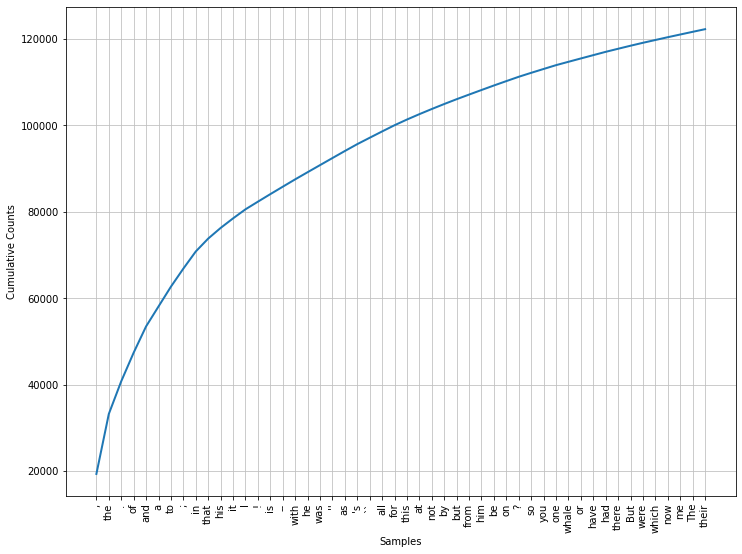

In [17]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# plot the freqiuency distribution of the top words
freq_dist.plot(50, cumulative=True)

Now that we've dived more deeply into the words in our text, we might want to also take some time to examine particular words of interest.  First, we'll just the count of a particular word.

In [18]:
# count the occurrences of a word of interest
word_tokens.count('whale')

780

# VII.  Key Word in Context (KWIC)

It can also be useful to examine the context in which particular words appear.  For example, we might have prior knowledge about the importance of a word of interest, or we might have seen something earlier in our analysis that prompts us to want to look deeper into a particuar word.  To accomplish this, we first create a concordance for the text.  A concordance is an index that tracks the location in the text of every occurence of every word.



In [19]:
# create a condorance obj
obj_concord = nltk.text.ConcordanceIndex(word_tokens)

Once we have a concordance, we can query it for a word of interest and return a desiognated number of characters on either side of each of a designated number of occurrences.

In [20]:
obj_concord.print_concordance("whale", width=80, lines=25)


Displaying 25 of 780 matches:
t least , take the higgledy-piggledy whale statements , however authentic , in 
e dreadful gulf of this monster 's ( whale 's ) mouth , are immediately lost an
tient Job . '' -- RABELAIS . `` This whale 's liver was two cartloads . '' -- S
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale . '' -- IBID . `` HISTORY OF LIFE AN
 . '' -- KING HENRY . `` Very like a whale . '' -- HAMLET . `` Which to secure 
restless paine , Like as the wounded whale to shore flies thro ' the maine . ''
t had been a sprat in the mouth of a whale . '' -- PILGRIM 'S PROGRESS . `` Tha
EN 'S ANNUS MIRABILIS . `` While the whale is floating at the stern of the ship
onas-in-the-Whale ... . Some say the whale ca n't open his mouth , but that is 
 masts to see whether they can see a whale , for the first discoverer has a duc
 for his pains ... . I was told of a whale taken near Shetland , that had above
oneers tol

# VIII.  Word Cooccurrence Networks (n-grams)

Let's also take some time to do some preliminary analysis of which words tend to cooccur in the text.  For our preliminary analysis, we'll look only at bi-grams, which are pairs of words that frequently appear next to each other in the text.

In [21]:
# create a list of bigrams
bigram_list = list(bigrams(word_tokens))

In [22]:
# create a count of unique bigrams
bigram_counts = collections.Counter(bigram_list)
print(bigram_counts)

Output hidden; open in https://colab.research.google.com to view.

Now that we have a frequency tagged list of bigrams that appear in the text, we can work on plotting a network graph to represent the top bigrams.  We'll do this using the Pandas and Networkx packages.

The Networks package, which we will use to draw the network graph, expects to receive data in the form a a data.frame (a data.frame is spreadsheet like data structure that contains columns, each of which is a field (or variable in statistical language) and rows (each of which represents a single item (or observation in statistical language.  

At present, however, our bigram data is in the form of a list of key/value pairs.  Happily, the Pandas package has functions for creating and working with data.frames, so we'll use Pandas to convert the data into a data.frame and then send that data.frame to Networkx to draw our plot.

In [23]:
# create an empty pandas DataFrame
bigram_df = pandas.DataFrame(data=None, columns=['source', 'target', 'weight'])


In [24]:
# add top bigram items to the dataframe
for x, z in bigram_counts.most_common(20):
  bigram_df.loc[len(bigram_df.index)] = [x[0], x[1], z] 

In [25]:
# create the nodegraph using Networkx
net_graph = networkx.from_pandas_edgelist(bigram_df, source='source', target='target', edge_attr='weight')

And now we're ready to draw the plot to screen.

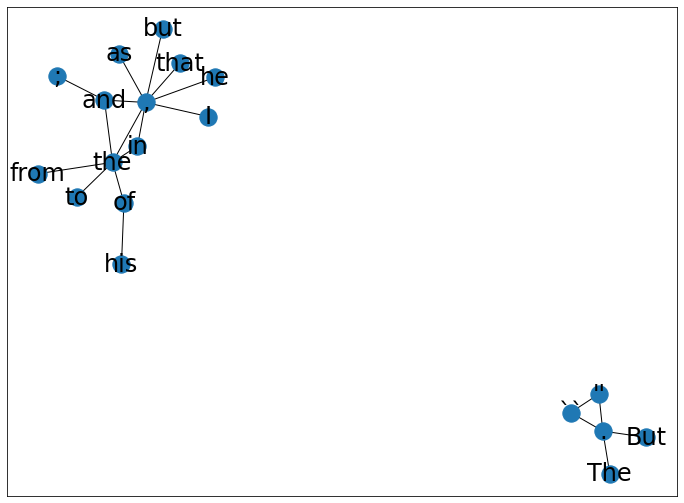

In [26]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# draw the graph as a force directed graph
networkx.draw_networkx(net_graph, with_labels=True, font_size=24)

We can also draw the network as a circular rather than force directed graph.

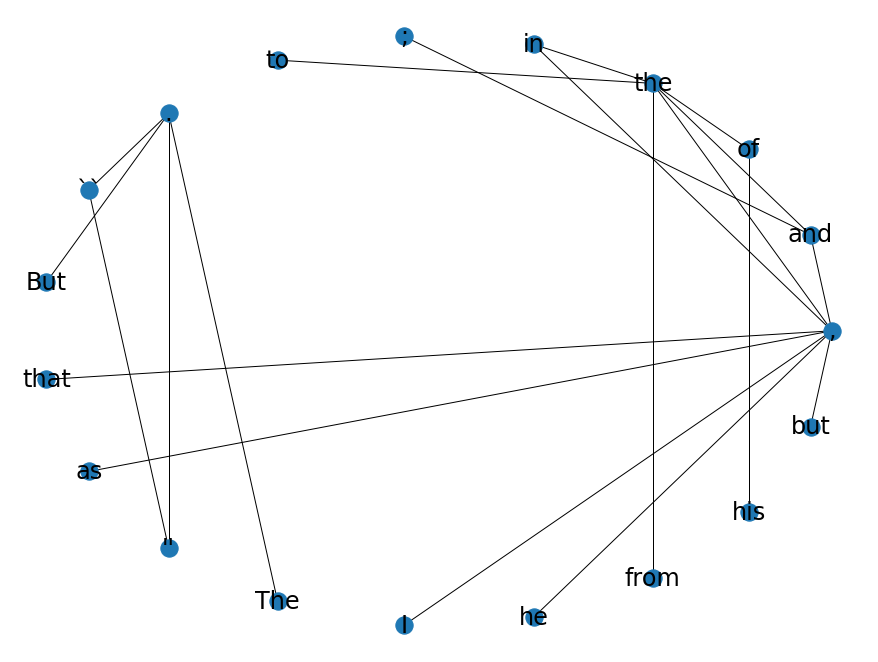

In [27]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# draw the graph as a circular graph
networkx.draw_circular(net_graph, with_labels=True, font_size=24)

# IX. Word Occurrence Dispersion Plot

We can also plot the disperson word occurence across the narrative time of the text.  This allows us to see how different words function in the text.

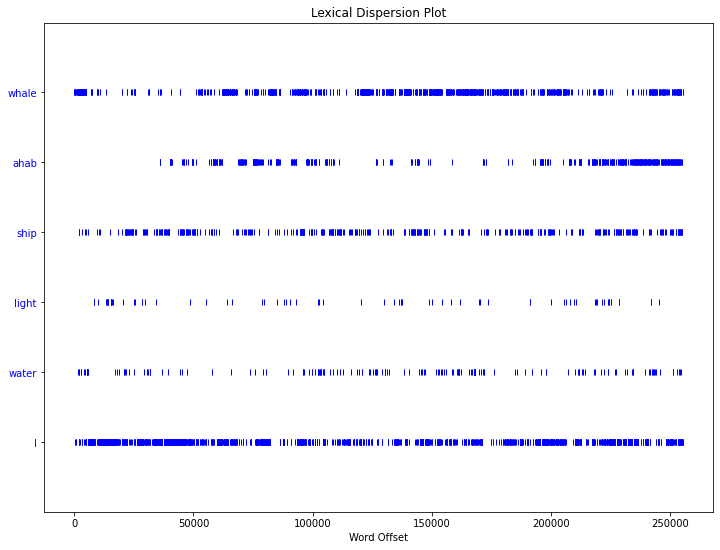

In [28]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# define the words you want to plot
targets=['whale', 'ahab', 'ship', 'light', 'water', 'I']
#draw the plot
dispersion_plot(word_tokens, targets, ignore_case=True, title='Lexical Dispersion Plot')

# X. Part of Speech (POS) Analysis

We can also do some simple analysis of the distribution of parts of speech in the text.  Note that this is solidly in the camp of Natural Language Processing, since NLTK uses english natural language models to parse the text into sentences, phrases, and finally POS based on the grammatical structure of the english language.

In [29]:
# First we'll perfor the pos tagging
tagged = nltk.pos_tag(word_tokens)

Now that we've tagged the text for POS, let's take a quick look at the result.

In [30]:
# look at the first ten POS tagged words
print(tagged[0:10:1])

[('The', 'DT'), ('Project', 'NNP'), ('Gutenberg', 'NNP'), ('EBook', 'NNP'), ('of', 'IN'), ('Moby', 'NNP'), ('Dick', 'NNP'), (';', ':'), ('or', 'CC'), ('The', 'DT')]


<font size="2">note:  a key to the POS tags applied by the NLTK can be found in the appendix at the end of this notebook.

We see in the above that the results of our POS tagging is a list of key/value pairs where the 'key' is the word and the 'value' is the code for the part of speech that the compter has determined for each key.  

Next, we'll extract just the POS tags from the pairs and save them as a list.

In [31]:
# create a list of just POS tags
pos_list = []
for word, pos in tagged:
  pos_list.append(pos)

Now, let's look at this list to make sure we got it right.

In [32]:
# first, see how long the list is.  It should be the same length as our 
# original list of words in the text, which we've already calculated above.
print(len(pos_list))

258660


In [33]:
# Now we'll look at the first ten POS tags in this list to see if
# everything looks right
print(pos_list[0:10:1])

['DT', 'NNP', 'NNP', 'NNP', 'IN', 'NNP', 'NNP', ':', 'CC', 'DT']


Now we'll create a frequency distribution of our POS tags and examine the list.

In [34]:
# create a frequency distribution of POS
pos_freq_dist = nltk.probability.FreqDist(pos_list)

In [35]:
# Look at the most frequent POS
print(pos_freq_dist.most_common(n=50))

[('NN', 33214), ('IN', 29059), ('DT', 26221), (',', 19356), ('JJ', 17828), ('RB', 13833), ('PRP', 11671), ('NNS', 10612), ('.', 10334), ('NNP', 10137), ('CC', 9491), ('VBD', 8806), ('VB', 7027), (':', 6136), ('VBN', 5206), ('VBG', 4933), ('PRP$', 4832), ('TO', 4655), ('VBZ', 4320), ('VBP', 3578), ('MD', 2519), ('CD', 1953), ("''", 1829), ('``', 1476), ('POS', 1350), ('WRB', 1205), ('RP', 1148), ('WDT', 1123), ('WP', 1018), ('JJS', 579), ('JJR', 577), ('EX', 560), ('PDT', 496), ('RBR', 343), ('UH', 289), ('(', 235), (')', 235), ('RBS', 198), ('NNPS', 123), ('WP$', 86), ('FW', 63), ('$', 5), ('#', 1)]


And, finally, we'll plot the POS frequncy distribution.

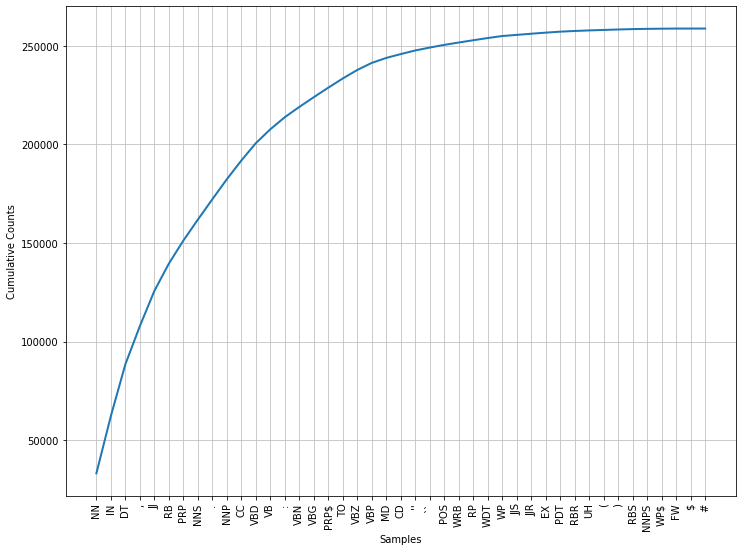

In [36]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# plot the freqiuency distribution of POS
pos_freq_dist.plot(50, cumulative=True)

We can also do a dispersion plot of parts of speech to see if there are patterns that represent stylistic shifts across the time of the novel.

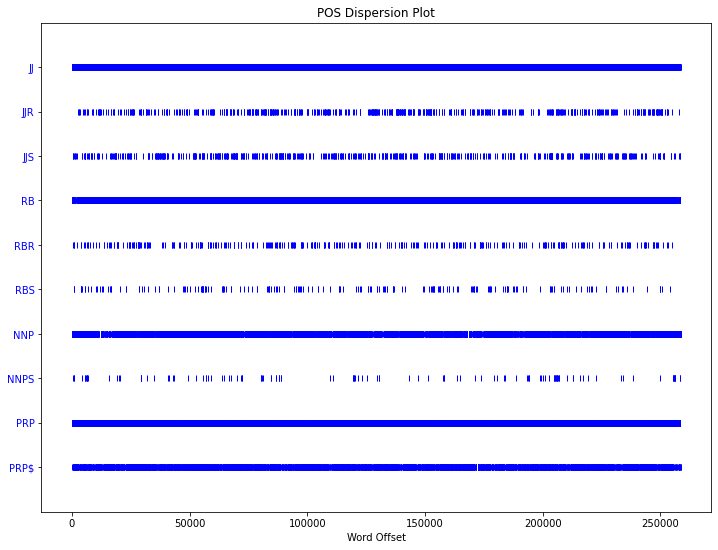

In [37]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# define the words you want to plot
targets=['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'NNP', 'NNPS', 'PRP', 'PRP$']
#draw the plot
dispersion_plot(pos_list, targets, ignore_case=True, title='POS Dispersion Plot')

# XI.  Wrapping Up

At this point, you've examined the text from a variety of perspectives:  As a text blob (the full text that you originally loaded into the system); as sentences; as words, including some preliminary analysis of the relationshps between workds, and you've delved a bit into the grammatical structure of the text by looking a parts of speech.  

As per the introductory text to section IV, you should make a habbit of taking detailed noted of any trends and/or issues that note in the text while performing your preliminary analysis.  (Hopefully you did this in this instance.). Performing an intial forensic examination of your data and documenting it well is one of the most important, and frequently overlooked, steps in the data/text analysis.  The information that you gain during this forensics is crucuial to making good decisions about what needs to be done to prepare a text for analysis to answer specific scholarly questions about the text.

# Appendix:  NLTK POS Tag Key

The following is a key to the POS tags applied by the NLTK when performing POS tagging.

 
*   CC   | coordinating conjunction
*   CD   | cardinal digit
*   DT   | determiner
*   EX   | existential there (ex: 'there is')
*   FW   | foreign word
*   IN   | preposition/subordinating conjunction
*   JJ   | adjective (ex: big)
*   JJR  | adjective, comparative (ex: bigger)
*   JJS  | adjective, superlative (ex: biggest)
*   LS   | list marker (ex: '1)'
*   MD   | modal (ex: could, will)
*   NN   | noun, singular
*   NNS  | noun plural
*   NNP  | proper noun, singular
*   NNPS | proper noun, plural
*   PDT  | predeterminer (ex: 'all the kids')
*   POS  | possessive ending (ex: Sam's)
*   PRP  | personal pronoun
*   PRP\$ | possessive pronoun 
*   RB   | adverb (ex: very) 
*   RBR  | adverb, comparative (ex: better)
*   RBS  | adverb, superlative (ex: best)
*   RP   | particle 
*   TO   | to (ex: to go 'to' the store.)
*   UH   | interjection 
*   VB   | verb, base form (ex: take)
*   VBD  | verb, past tense (ex: took)
*   VBG  | verb, gerund/present participle (ex: taking)
*   VBN  | verb, past participle (ex: taken)
*   VBP  | verb, sing. present, non-3d (ex: take)
*   VBZ  | verb, 3rd person sing. present (ex: takes)
*   WDT  | wh-determiner (ex: which)
*   WP   | wh-pronoun (ex: who, what)
*   WP\$  | possessive wh-pronoun (ex: whose)
*   WRB  | wh-abverb (ex: where, when)